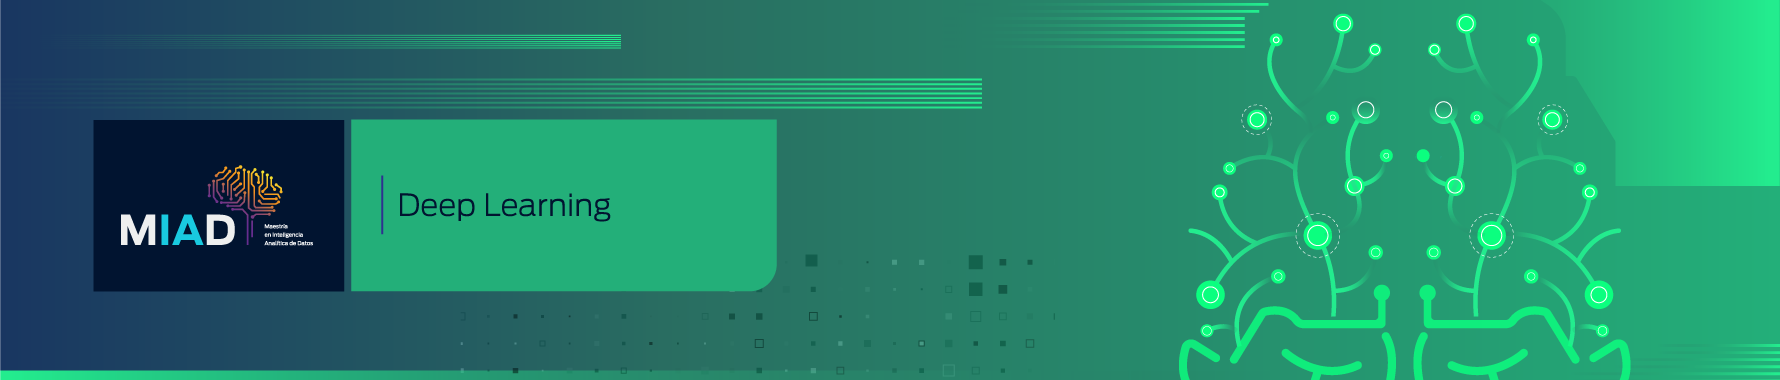

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from joblib import Parallel, delayed

In [2]:
import tensorflow as tf 
from tensorflow import keras
print(tf.__version__)

2.14.0


### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [44]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

# Cargue de datos
data = pd.read_csv('BankChurners.csv', encoding='UTF-8', index_col=0)
# Se eliminan las últimas 2 columnas 
data = data.iloc[:, :-2]

print("\033[1mVista preliminar de los datos: \033[0m")
display(data.head())
print("\033[1mConteo de ddatos nulos por variable: \033[0m")
display(data.isnull().sum())

categorical_columns=data.select_dtypes(include=['object']).columns
#print("Variable Categórica: "+categorical_cols)

numerical_cols=data.select_dtypes(exclude=['object']).columns
#print("Variable numérica: "+numerical_cols)

print("\033[1mDescriptivos de variables numéricas: \033[0m")
display(data.describe())

print("\033[1mDescriptivos de variables categóricas: \033[0m")
display(data.describe(include=['object']))



Vista preliminar de los datos: 


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Conteo de ddatos nulos por variable: 


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Descriptivos de variables numéricas: 


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Descriptivos de variables categóricas: 


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Histogramas: 


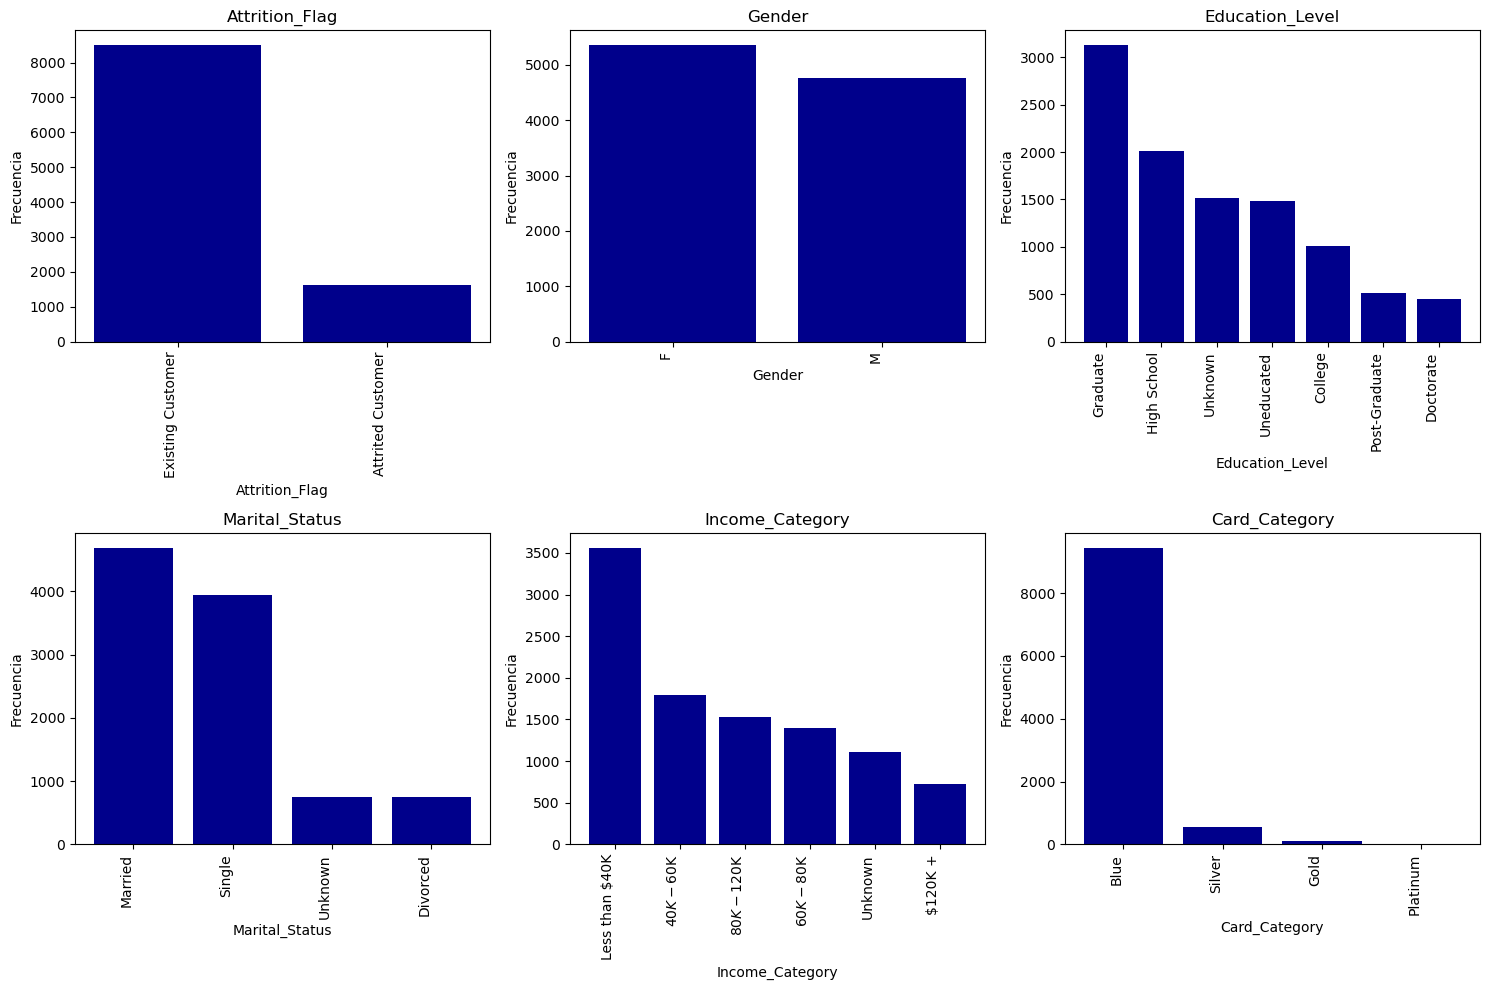

In [40]:
print("\033[1mHistogramas: \033[0m")

# Configurar el diseño de subplots
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Tamaño de gráficos
plt.figure(figsize=(15, 5 * num_rows))

# Iterar sobre las variables categóricas y crear un histograma para cada una
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Valores únicos y frecuencias
    unique_values = data[col].value_counts()
    
    # Histograma
    plt.bar(unique_values.index, unique_values.values, color='darkblue')
    
    # Etiquetas y título
    plt.xlabel(col,)
    plt.ylabel('Frecuencia')
    plt.title(f'{col}')
    
     # Rotación del texto del eje x
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


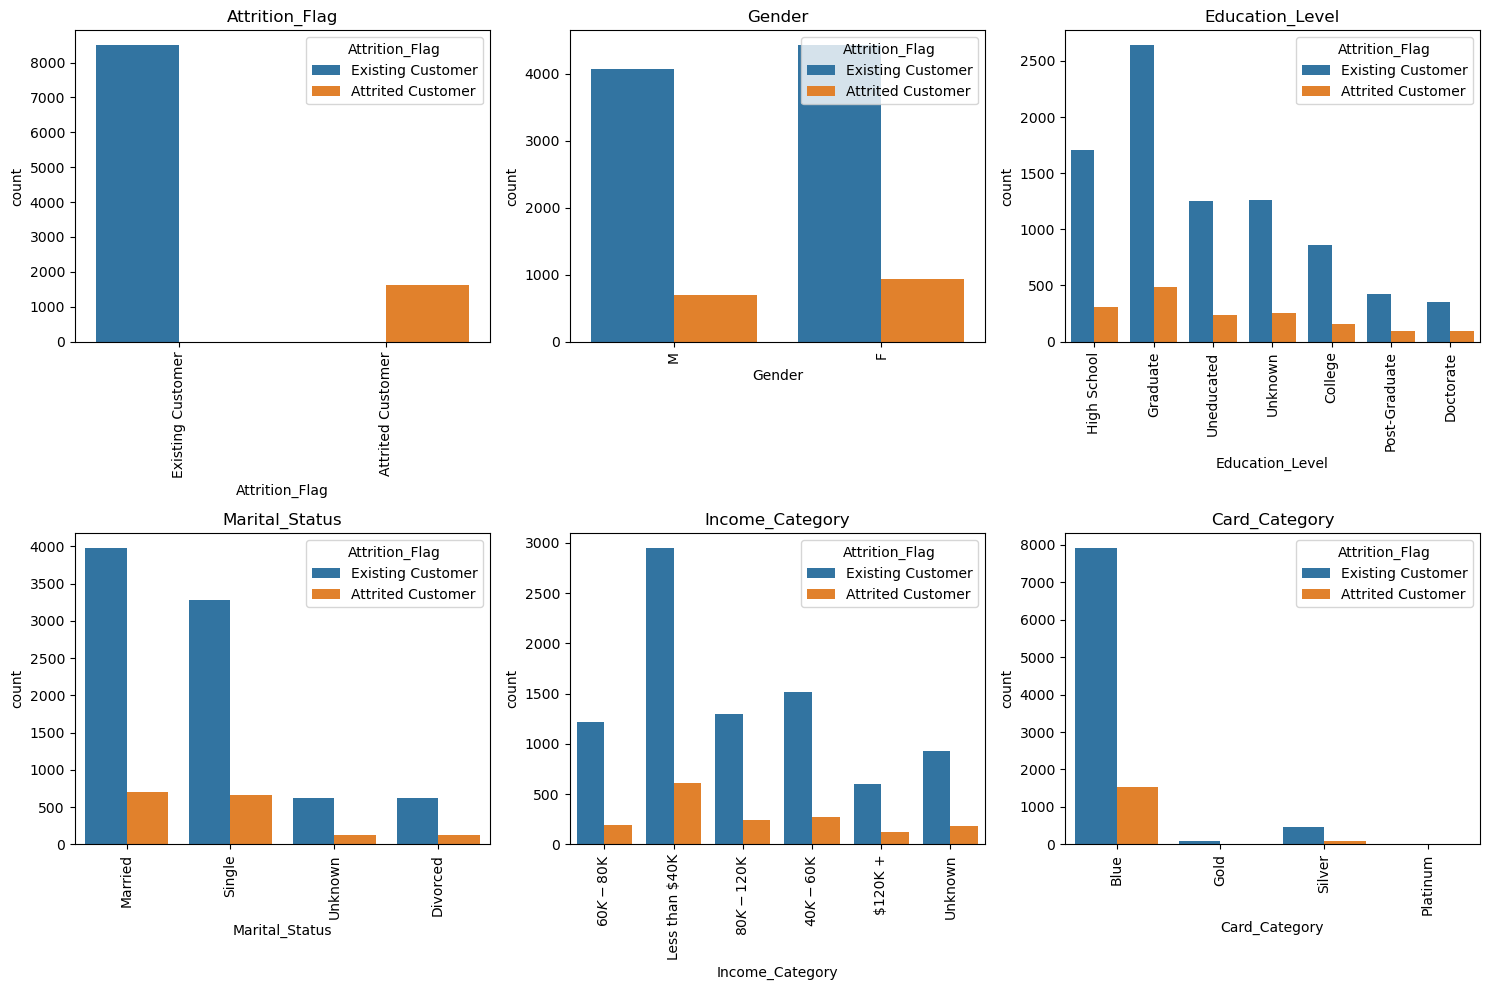

In [5]:
print("\033[1mHistogramas según variable a predecir: \033[0m")

# Número total de filas y columnas para graficos
categorical_columns=data.select_dtypes(include=['object']).columns
total_plots = len(categorical_columns)
rows = (total_plots + 2) // 3  # División entera para calcular el número de filas
cols = min(3, total_plots)  # No más de 3 columnas

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Iterar sobre las columnas categóricas y dibujar las gráficas
for i, column in enumerate(categorical_columns):
    row_idx = i // cols
    col_idx = i % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]
    sns.countplot(x=column, data=data, hue='Attrition_Flag', ax=ax)
    ax.set_title(column)
    ax.legend(title='Attrition_Flag', loc='upper right')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

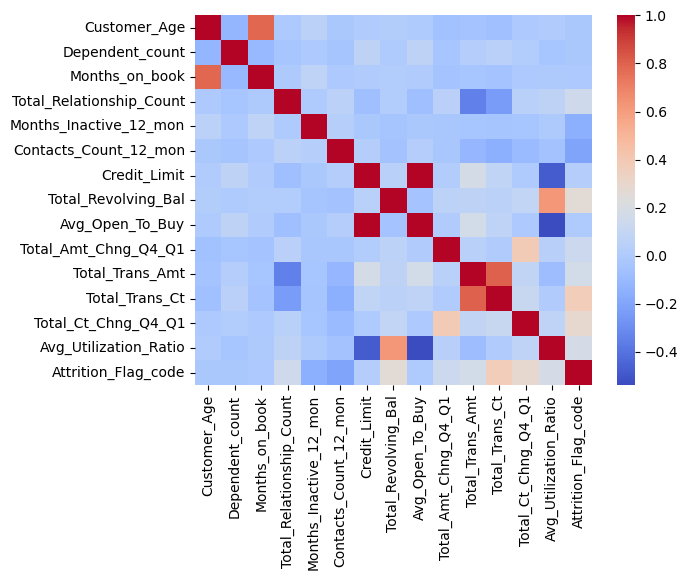

In [6]:
print("\033[1mMatriz de Correlación de variables: \033[0m")

# Codifica variable a predecir
label_encoder = LabelEncoder()
data['Attrition_Flag_code'] = label_encoder.fit_transform(data['Attrition_Flag'])

# Visualización de la matriz de correlación
df_model = data[numerical_cols]

corr = df_model.corr()
sns.heatmap(corr,  cmap='coolwarm')

plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)
Se dispone de la base de datos de clientes de un banco con el objetivo de anticipar aquellos que tienen una alta probabilidad de cancelar su Tarjeta de Crédito, permitiendo así llevar a cabo un proceso de retención de manera oportuna. Para iniciar, se procede a vincular los datos en formato CSV y posteriormente realizar un análisis preliminar de las variables. Tras obtener una vista preliminar de los datos, se identifica la presencia de variables tanto categóricas como numéricas, sin encontrar valores nulos entre ellas.

En total, se cuentan con 10.127 observaciones distribuidas en 15 columnas, incluyendo la variable a predecir. La edad promedio de los clientes es de 46 años, todos mayores de edad y con una edad máxima de 73 años. En promedio, tienen 2 dependientes, una antigüedad promedio de 35 meses, con un mínimo de 1 año. Asimismo, presentan un promedio de 2 meses de inactividad en el último año, además de contactos con el cliente.

Adicionalmente, en promedio, estos clientes han tenido un límite de crédito que oscila entre 1.438 y 34.516 unidades monetarias, con saldos promedio de 1.162 unidades monetarias. Respecto a la utilización de la tarjeta, en promedio es del 27%, aunque algunos clientes han alcanzado hasta el 100% de su cupo mediante un promedio de 4.400 transacciones. Estas variables, entre otras, contribuirán a identificar patrones de clientes que potencialmente podrían optar por cancelar su tarjeta.

Posteriormente se realizan visualizaciones de histogramas con el fin de identificar la frecuencia de los datos por cada variable categórica, en donde se observa que de los 10 mil clientes aproximadamente el 20% corresponde a caracteríticas de clientes que ya se han fugado, además no hay gran distinción de genero, además con nivel de educación graduate. En su mayoría son personas con ingresos menores a $40 y con categoria de tarjeta Blue con mayor participación, por último se grafica un mapa de correlación entre variables numéricas siendo estás con las que finalmente se van a tener en cuenta para el modelo, en donde se observa existe una leve correlación positiva entre las variables Months_on_book y Customer_Age y a la vez una correlación negatova entre Avg_Utilizaacion_Ratio y las variables Credit_limit y Avg_Open_To_Buy.

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

## Modelo de red neuronal

### Creación de la red

In [50]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(keras.layers.Dense(12, input_dim=14, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


#### Visualización de la red

In [51]:
model.summary()
#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                180       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 293 (1.14 KB)
Trainable params: 293 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compilación del Modelo

In [10]:
#complilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Entrenamiento del modelo

In [11]:
#Entrenamiento del modelo
history=model.fit(X_train, y_train, epochs=100, batch_size=25)

Epoch 1/100
325/325 [==============================] - 1s 2ms/step - loss: 100.5414 - accuracy: 0.8043
Epoch 2/100
325/325 [==============================] - 0s 1ms/step - loss: 2.7355 - accuracy: 0.8108
Epoch 3/100
325/325 [==============================] - 0s 1ms/step - loss: 1.4001 - accuracy: 0.8053
Epoch 4/100
325/325 [==============================] - 0s 1ms/step - loss: 1.5618 - accuracy: 0.8040
Epoch 5/100
325/325 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.8184
Epoch 6/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8640 - accuracy: 0.8263
Epoch 7/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8867 - accuracy: 0.8304
Epoch 8/100
325/325 [==============================] - 0s 1ms/step - loss: 1.0424 - accuracy: 0.8227
Epoch 9/100
325/325 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.8348
Epoch 10/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8193 - accu

#### Gráficas del Accuracy y función de pérdida

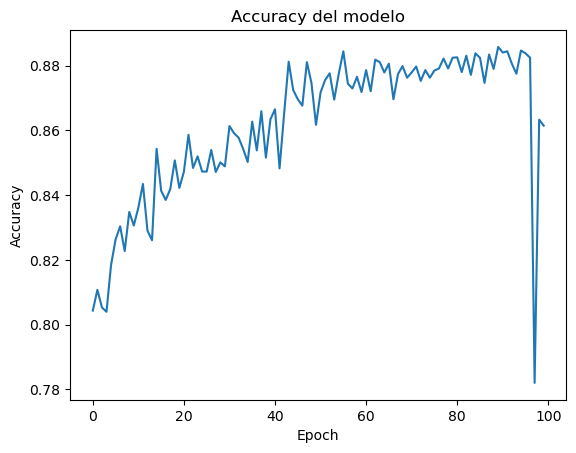

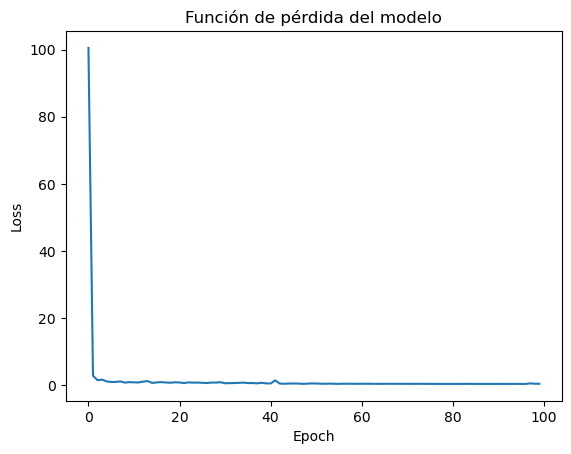

In [12]:
# Graficar accuracy del modelo
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Graficar la función de pérdida evaluada
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [13]:
#Accuracy del modelo para train
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

254/254 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8479
Accuracy: 84.79


#### Evaluación del modelo

In [14]:
#Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8475


64/64 [==============================] - 0s 1ms/step
El accuracy del modelo es: 0.8474827245804541
La precisión del modelo es: 0.8475
La matriz de confusión es: [[  22  305]
 [   4 1695]]
El AUC del modelo es: 0.8232941485637352


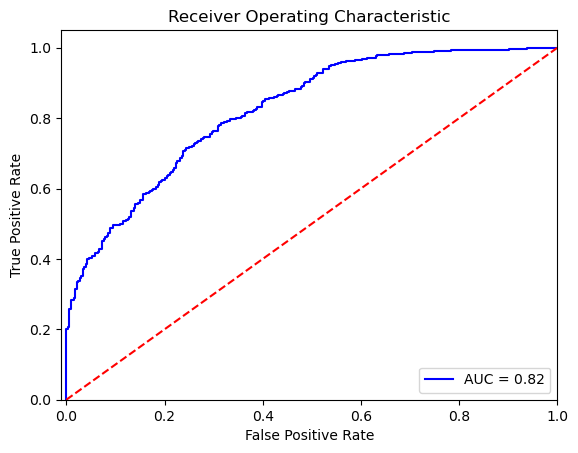

In [15]:
# Hallar probabilidades y clasificación que predice el modelo con threshold de 0.5
predicciones = model.predict(X_test)
y_pred = [round(x[0]) for x in predicciones]
# Imprimir métricas de desempeño
print("El accuracy del modelo es: "+str(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=y_test, y_pred=y_pred)))
print("La matriz de confusión es: "+str(confusion_matrix(y_true=y_test, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Inicialmente, se construye una red neuronal utilizando Keras. Se define un modelo secuencial que consta de una capa de aplanamiento seguida de capas densamente conectadas y una capa de salida. En este caso, la primera capa tiene 14 variables de entrada y utiliza la función de activación ReLU. La segunda capa tiene 8 neuronas con activación ReLU, y la capa de salida utiliza activación sigmoide. Se genera una visualización de la arquitectura de la red antes de compilar el modelo.

Para la compilación del modelo, se selecciona la función de pérdida binary_crossentropy, el optimizador "adam" y la métrica de precisión (accuracy), considerando que se trata de un problema de clasificación binaria.

Posteriormente, se procede al entrenamiento del modelo utilizando los datos de entrenamiento (x e y). Se establece un número de épocas de 100, que representa el número completo de ciclos durante los cuales se recorren todos los datos, con un tamaño de lote de 25, que indica el número de muestras utilizadas en cada actualización de los pesos del modelo. Se obtiene una precisión (accuracy) del 84% durante el entrenamiento, y al evaluar el modelo con los datos de prueba se alcanza también un accuracy del 84%.

Finalmente, se calcula la matriz de confusión y se grafica el Área Bajo la Curva (AUC), que en este caso específico tiene un valor de 0.82, proporcionando una medida adicional de la calidad del modelo en la clasificación binaria.

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

#### Modelo de red neuronal

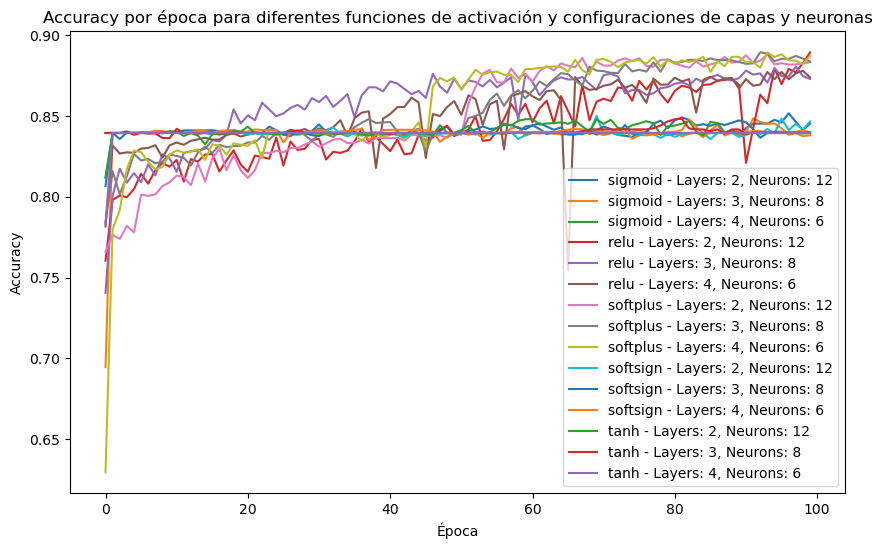

In [18]:

# Funciones de activación para iterar
activations = ['sigmoid', 'relu', 'softplus', 'softsign', 'tanh']

# Configuraciones de capas y neuronas
layer_configs = [(2, 12), (3, 8), (4, 6)]

# Función para crear y entrenar modelos
def train_model(activation, layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=14, activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Última capa con activación sigmoide
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy (Activation: {activation}, Layers: {layers}, Neurons: {neurons}): {test_acc}')
    return history.history['accuracy']

# Iterar sobre las funciones de activación y las configuraciones de capas y neuronas de forma paralela
accuracies = Parallel(n_jobs=-1)(delayed(train_model)(activation, layers, neurons) for activation in activations for layers, neurons in layer_configs)

# Graficar resultados
plt.figure(figsize=(10, 6))
for i, activation in enumerate(activations):
    for j, (layers, neurons) in enumerate(layer_configs):
        label = f'{activation} - Layers: {layers}, Neurons: {neurons}'
        plt.plot(accuracies[i * len(layer_configs) + j], label=label)
plt.title('Accuracy por época para diferentes funciones de activación y configuraciones de capas y neuronas')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Mejores parámetros

Epoch 1/100
325/325 [==============================] - 1s 1ms/step - loss: 128.7311 - accuracy: 0.6897
Epoch 2/100
325/325 [==============================] - 0s 1ms/step - loss: 3.3620 - accuracy: 0.8001
Epoch 3/100
325/325 [==============================] - 0s 1ms/step - loss: 1.3622 - accuracy: 0.8031
Epoch 4/100
325/325 [==============================] - 0s 1ms/step - loss: 0.9277 - accuracy: 0.8116
Epoch 5/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8911 - accuracy: 0.8121
Epoch 6/100
325/325 [==============================] - 1s 2ms/step - loss: 0.8575 - accuracy: 0.8118
Epoch 7/100
325/325 [==============================] - 1s 2ms/step - loss: 1.3678 - accuracy: 0.8108
Epoch 8/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8786 - accuracy: 0.8103
Epoch 9/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8678 - accuracy: 0.8093
Epoch 10/100
325/325 [==============================] - 0s 1ms/step - loss: 0.8876 - accu

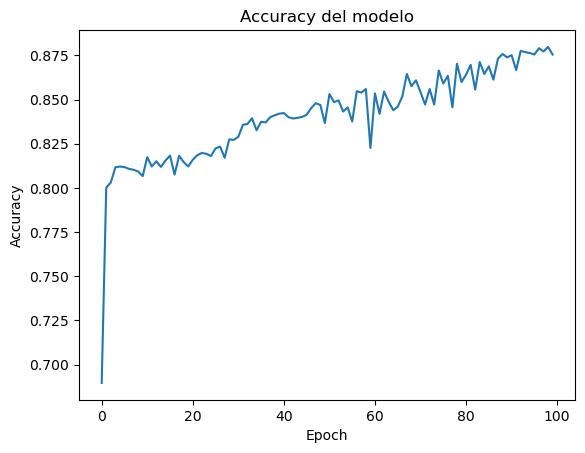

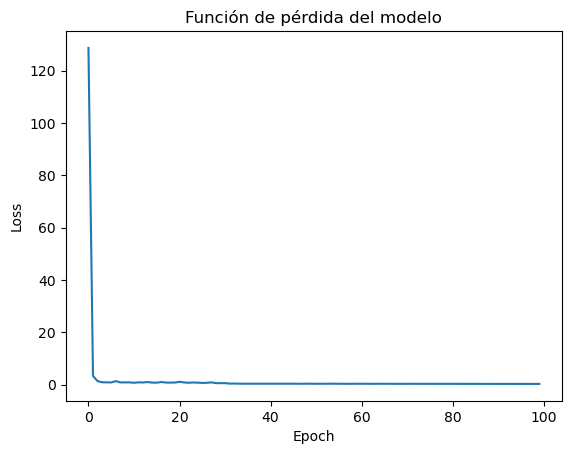

254/254 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8717
Accuracy: 87.17
64/64 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8633
Accuracy: 86.33
64/64 [==============================] - 0s 1ms/step
El accuracy del modelo es: 0.8632773938795657
La precisión del modelo es: 0.8699271592091571
La matriz de confusión es: [[  77  250]
 [  27 1672]]
El AUC del modelo es: 0.8662425999823606


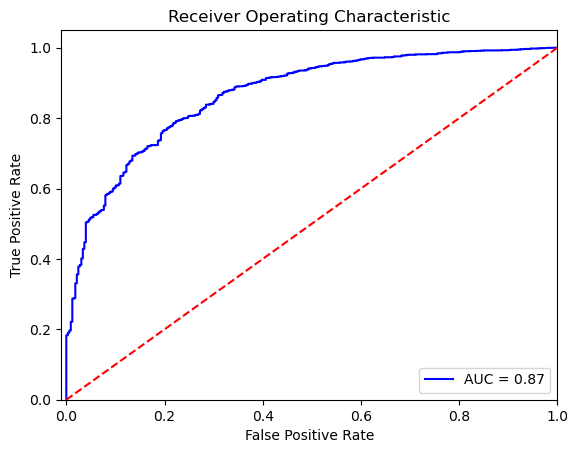

In [28]:
model = Sequential()
model.add(Dense(8, input_dim=14, activation='softplus'))
model.add(Dense(8, activation='softplus'))
#model.add(Dense(6, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))

#complilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenamiento del modelo
history=model.fit(X_train, y_train, epochs=100, batch_size=25)

# Graficar accuracy del modelo
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Graficar la función de pérdida evaluada
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Accuracy del modelo para train
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (test_acc*100))

# Hallar probabilidades y clasificación que predice el modelo con threshold de 0.5
predicciones = model.predict(X_test)
y_pred = [round(x[0]) for x in predicciones]
# Imprimir métricas de desempeño
print("El accuracy del modelo es: "+str(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=y_test, y_pred=y_pred)))
print("La matriz de confusión es: "+str(confusion_matrix(y_true=y_test, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Después de explorar diversas iteraciones entre funciones de activación, números de capas y cantidad de neuronas, se elabora un gráfico que facilita la identificación de las combinaciones que producen un mejor rendimiento del modelo en términos de precisión (accuracy) utilizando tanto los datos de entrenamiento como los de prueba. Se decide mantener la función de activación sigmoide para la capa de salida, dado que en problemas de clasificación binaria es una elección sólida para dicha capa, y se observan mejores resultados por su interpretación probabilistica.

Como resultado del análisis, se destaca la función de activación Softplus y con 3 capas, logrando un accuracy del 0.86 tanto en el conjunto de entrenamiento como en el de prueba, junto con un Área Bajo la Curva (AUC) de 0.87. Esta función, al proporcionar una salida no lineal suave y evitar problemas de saturación, puede ser especialmente beneficiosa para mejorar la capacidad del modelo lo que ayuda a mejorar el rendimiento del modelo.